In [1]:
import pandas as pd
import pylab as plt
%matplotlib inline

import seaborn as sns

In [2]:
ef = pd.read_csv(
    'county_pop_risk_covid.csv', 
    dtype={'county': str}).rename(columns={'county': 'fips'})

In [3]:
ef.head()

,population,fips,Influenza_Influenza,Influenza_Staphylococcus,Influenza_Streptococcal,Staphylococcus_Influenza,Staphylococcus_Staphylococcus,Staphylococcus_Streptococcal,Streptococcal_Influenza,Streptococcal_Staphylococcus,Streptococcal_Streptococcal,risk,risk_flu,covid,covidpc
0,55869,01001,1.41037,1.87564,1.86617,1.56285,2.24713,2.25002,1.60466,2.36944,2.37952,0.58228,0.70903,1839,0.03292
1,223234,01003,1.37102,1.79479,1.78488,1.39316,1.76917,1.74624,1.49399,2.04678,2.03804,0.60598,0.72938,6116,0.02740
2,24686,01005,1.51121,2.13510,2.13595,1.60466,2.37257,2.38319,1.67352,2.57606,2.59884,0.51883,0.66172,923,0.03739
3,22394,01007,1.49891,2.10502,2.10508,1.63417,2.45799,2.47351,1.67352,2.57606,2.59884,0.52549,0.66715,691,0.03086
4,57826,01009,1.46694,2.02123,2.01793,1.55548,2.22812,2.23019,1.63909,2.47588,2.49285,0.54485,0.68169,1665,0.02879


In [4]:
df = pd.read_csv(
    'cc-est2019-alldata.csv', 
    encoding='ISO-8859-1', 
    dtype={'STATE': str, 'COUNTY': str})
df = df[df.YEAR==12]
df['fips'] = df.STATE + df.COUNTY

In [5]:
AGE_GRP0, AGE_GRP1 = 14, 19
df_ = df[df.AGEGRP.between(AGE_GRP0, AGE_GRP1)].reset_index().groupby('fips').sum()

columns = ['TOT_POP', 'risk','risk_flu', 'covid', 'fips']
df_ = df_.join(ef.set_index('fips')).reset_index()[columns].set_index('fips')
df_['covidpc']=df_.covid / df_.TOT_POP
df_['covidodd'] = df_.covidpc / (1 - df_.covidpc)
df_ = df_.dropna()
display(df_.corr())

,TOT_POP,risk,risk_flu,covid,covidpc,covidodd
TOT_POP,1.000000,0.583462,0.577787,0.946185,0.041950,0.038240
risk,0.583462,1.000000,0.998056,0.509224,0.126304,0.117827
risk_flu,0.577787,0.998056,1.000000,0.504957,0.136273,0.127374
covid,0.946185,0.509224,0.504957,1.000000,0.126192,0.121364
covidpc,0.041950,0.126304,0.136273,0.126192,1.000000,0.998801
covidodd,0.038240,0.117827,0.127374,0.121364,0.998801,1.000000


In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

                 Generalized Linear Model Regression Results                  
Dep. Variable:                covidpc   No. Observations:                 3086
Model:                            GLM   Df Residuals:                     3083
Model Family:                Gaussian   Df Model:                            2
Link Function:                    log   Scale:                      0.00021980
Method:                          IRLS   Log-Likelihood:                 8619.0
Date:                Wed, 21 Oct 2020   Deviance:                      0.67766
Time:                        12:08:04   Pearson chi2:                    0.678
No. Iterations:                    16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5987      0.106    -43.378      0.0

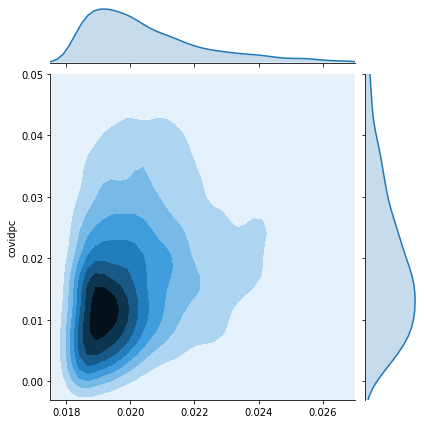

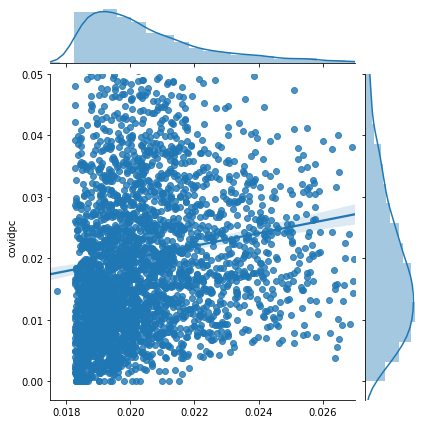

In [7]:
formula = 'covidpc ~ risk + TOT_POP'

mod2 = smf.glm(
    formula=formula,
    data=df_,
    family=sm.families.Gaussian(sm.families.links.log())
).fit()
print(mod2.summary())

yhat = mod2.mu
ax = sns.jointplot(x=yhat, y=df_.covidpc, kind='kde', xlim=[0.0175,.027], ylim=[-.003,.05])
ax = sns.jointplot(x=yhat, y=df_.covidpc, kind='reg', xlim=[0.0175,.027], ylim=[-.003,.05])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                covidpc   No. Observations:                 3086
Model:                            GLM   Df Residuals:                     3083
Model Family:                Gaussian   Df Model:                            2
Link Function:                    log   Scale:                      0.00021908
Method:                          IRLS   Log-Likelihood:                 8624.1
Date:                Wed, 21 Oct 2020   Deviance:                      0.67543
Time:                        12:08:07   Pearson chi2:                    0.675
No. Iterations:                    18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2909      0.187    -28.300      0.0

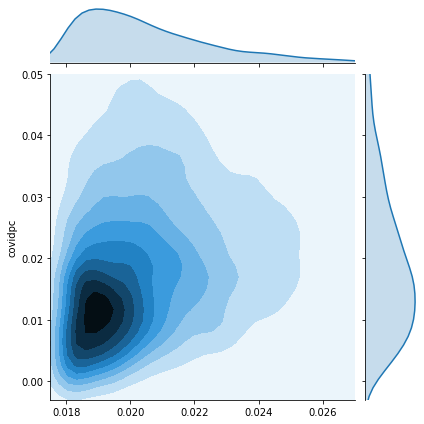

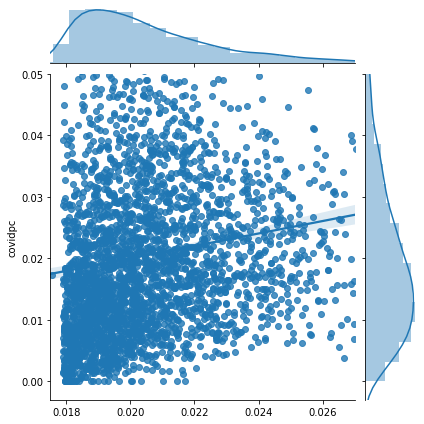

In [8]:
formula = 'covidpc ~ risk_flu + TOT_POP'

mod2 = smf.glm(
    formula=formula,
    data=df_,
    family=sm.families.Gaussian(sm.families.links.log())
).fit()
print(mod2.summary())

yhat = mod2.mu
ax = sns.jointplot(x=yhat, y=df_.covidpc, kind='kde', xlim=[0.0175,.027], ylim=[-.003,.05])
ax = sns.jointplot(x=yhat, y=df_.covidpc, kind='reg', xlim=[0.0175,.027], ylim=[-.003,.05])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                covidpc   No. Observations:                 3086
Model:                            GLM   Df Residuals:                     3082
Model Family:                Gaussian   Df Model:                            3
Link Function:                    log   Scale:                      0.00021421
Method:                          IRLS   Log-Likelihood:                 8659.3
Date:                Wed, 21 Oct 2020   Deviance:                      0.66019
Time:                        12:09:02   Pearson chi2:                    0.660
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.3138      0.959    -13.879      0.0

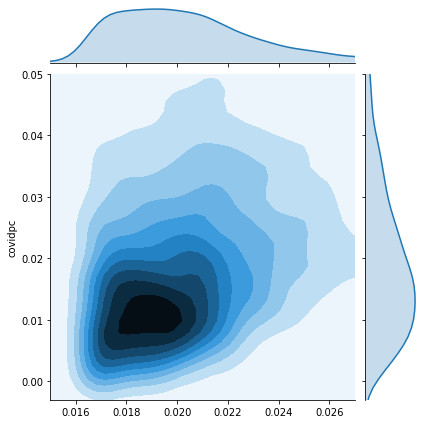

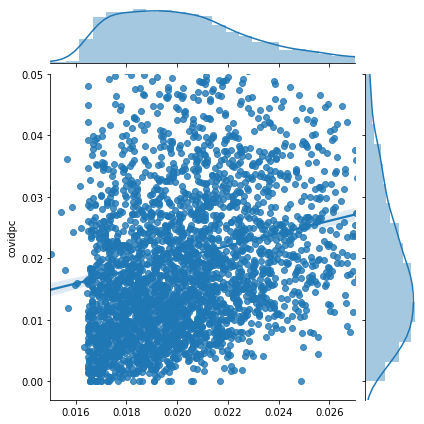

In [14]:
formula = 'covidpc ~ risk + risk_flu + TOT_POP'

mod2 = smf.glm(
    formula=formula,
    data=df_,
    family=sm.families.Gaussian(sm.families.links.log())
).fit()
print(mod2.summary())

yhat = mod2.mu
ax = sns.jointplot(x=yhat, y=df_.covidpc, kind='kde', xlim=[0.015,.027], ylim=[-.003,.05])
ax = sns.jointplot(x=yhat, y=df_.covidpc, kind='reg', xlim=[0.015,.027], ylim=[-.003,.05])

In [10]:
# model = smf.logit('covidodd ~ risk + TOT_POP', data=df_).fit()
# print(model.summary())

In [11]:
model = smf.glm(
    'covid ~ risk + TOT_POP',
    data=df_,
    family=sm.families.Poisson(sm.families.links.log())
).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  covid   No. Observations:                 3086
Model:                            GLM   Df Residuals:                     3083
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.9383e+06
Date:                Wed, 21 Oct 2020   Deviance:                   3.8520e+06
Time:                        12:08:12   Pearson chi2:                 4.70e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0647      0.003     25.199      0.0

In [12]:
model = smf.glm(
    'covid ~ risk_flu + TOT_POP',
    data=df_,
    family=sm.families.Poisson(sm.families.links.log())
).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  covid   No. Observations:                 3086
Model:                            GLM   Df Residuals:                     3083
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.8606e+06
Date:                Wed, 21 Oct 2020   Deviance:                   3.6967e+06
Time:                        12:08:12   Pearson chi2:                 4.58e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.4905      0.004  -1282.990      0.0

In [13]:
model = smf.glm(
    'covid ~ risk + risk_flu + TOT_POP',
    data=df_,
    family=sm.families.Poisson(sm.families.links.log())
).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  covid   No. Observations:                 3086
Model:                            GLM   Df Residuals:                     3082
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.8575e+06
Date:                Wed, 21 Oct 2020   Deviance:                   3.6905e+06
Time:                        12:08:12   Pearson chi2:                 4.60e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.7920      0.017   -398.815      0.0